In [1]:
import numpy as np
from scipy.integrate import ode
from scipy.constants import pi, hbar, m_n
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
def inveos(w0):
    return (((w0/k)**(1/Gamma))+(w0/(Gamma-1)))

In [3]:
def feqs1(x,z): #Field equations for the interior of the star
    w0, m, A0t, u, f, h = z
    y=inveos(w0)
    dmdx=3*y*x**2
    dfdx=(-4*B4b*(A0t**2/f)**n*f*(A0t*(-1 + h) + 4*h*n*u*x) - 2**n*A0t*(h*u**2*x**2 + 2*f*(-1 + h - 8*pi*w0*x**2)))/(2.*A0t*h*(2**n - 2*B4b*(A0t**2/f)**n*(-1 + 2*n))*x)
    dw0dx=-(dfdx*(w0 + y))/(2*f)
    dA0tdx=u
    dhdx=1/x - h/x + (2**(-1 + n)*x*(h*u**2 - 16*f*pi*y))/(f*(2**n - 2*B4b*(A0t**2/f)**n*(-1 + 2*n)))
    dudx=-((2**(-1 - n)*(-(2**n*A0t*dfdx*h*u*x**2) + 8*B4b*(A0t**2/f)**n*f**2*n*(-1 + h + dhdx*x) + 2**n*A0t*f*u*x*(4*h + dhdx*x)))/(A0t*f*h*x**2))
    return np.array([dw0dx, dmdx, dA0tdx, dudx, dfdx, dhdx])

In [4]:
def feqs2(x,z): #Field equations for the exterior of the star
    w0, m, A0t, u, f, h = z
    y=0
    dmdx=0
    dfdx=(-4*B4b*(A0t**2/f)**n*f*(A0t*(-1 + h) + 4*h*n*u*x) - 2**n*A0t*(h*u**2*x**2 + 2*f*(-1 + h - 8*pi*w0*x**2)))/(2.*A0t*h*(2**n - 2*B4b*(A0t**2/f)**n*(-1 + 2*n))*x)
    dw0dx=0
    dA0tdx=u
    dhdx=1/x - h/x + (2**(-1 + n)*x*(h*u**2 - 16*f*pi*y))/(f*(2**n - 2*B4b*(A0t**2/f)**n*(-1 + 2*n)))
    dudx=-((2**(-1 - n)*(-(2**n*A0t*dfdx*h*u*x**2) + 8*B4b*(A0t**2/f)**n*f**2*n*(-1 + h + dhdx*x) + 2**n*A0t*f*u*x*(4*h + dhdx*x)))/(A0t*f*h*x**2))
    return np.array([dw0dx, dmdx, dA0tdx, dudx, dfdx, dhdx])

In [5]:
def feqssolv(w0c): 
    eqs1=ode(feqs1)
    eqs2=ode(feqs2)
    eqs1.set_integrator('dopri5', atol=1e-10)
    eqs2.set_integrator('dopri5', atol=1e-10)
    x=np.arange(1e-3, 0.222895, dx)
    m=np.zeros_like(x)
    w0=np.zeros_like(x)
    A0t=np.zeros_like(x)
    u=np.zeros_like(x)
    f=np.zeros_like(x)
    h=np.zeros_like(x)
    A1=np.zeros_like(x)
    
    w0gen=6.633787136581382e-35*(1.5074345609999996e34*w0c - (1.2921451760330025e30*(1.*w0c**0.4273504273504274 + 0.27296310183238126*w0c)*(a0b**(4*n)*B4b**2*n**2*(-32.*w0c**0.4273504273504274 - 3.7328287430069236*w0c) + 4**n*a0b**2*(1.*w0c**0.4273504273504274 + 0.5855875090592112*w0c) + 2**n*a0b**(2 + 2*n)*B4b*(2.*w0c**0.4273504273504274 + (1.1711750181184224 - 1.8757464433609792*n)*w0c)))/(a0b**2*(2**n + a0b**(2*n)*B4b*(2. - 4.*n))**2))
    A0t0gen=0.000040955575317710555*(24416.70010108652*a0b + (B4b*n*(-0.6543086966490734*w0c**0.4273504273504274 - 0.0763256971765956*w0c))/(a0b*((-0.25*2**n)/a0b**(2*n) - 0.5*B4b + 1.*B4b*n)))
    u0gen=(B4b*n*(-0.0535951782132883*w0c**0.4273504273504274 - 0.006251925678785656*w0c))/(a0b*((-0.25*2**n)/a0b**(2*n) - 0.5*B4b + 1.*B4b*n))
    f0gen=(16.*a0b**(2 + 4*n)*B4b**2*(0.5 - 1.*n)**2 + a0b**(4*n)*B4b**2*n**2*(-0.0008575228514126129*w0c**0.4273504273504274 - 0.00010003081086057053*w0c) + 4**n*a0b**2*(1. + 0.000026797589106644154*w0c**0.4273504273504274 + 0.000015692333453752*w0c) + 2**n*a0b**(2 + 2*n)*B4b*(4. + n*(-8. - 0.00005026548245743669*w0c) + 0.00005359517821328831*w0c**0.4273504273504274 + 0.000031384666907504*w0c))/(a0b**2*(2**n + a0b**(2*n)*B4b*(2. - 4.*n))**2)
    h0gen=1 + (2**n*(-0.00005359517821328831*w0c**0.4273504273504274 - 6.251925678785658e-6*w0c))/(2**n + a0b**(2*n)*B4b*(2. - 4.*n))
    m0gen=(2**n*(6.3974531539019175e-9*w0c**0.4273504273504274 + 7.462686567164179e-10*w0c))/(2**n + a0b**(2*n)*B4b*(2. - 4.*n))
    
    
    m[0]=m0gen
    w0[0]=w0gen
    A0t[0]=A0t0gen
    u[0]=u0gen
    f[0]=f0gen
    h[0]=h0gen
    z=np.array([w0[0], m[0], A0t[0], u[0], f[0], h[0]]) 
    eqs1.set_initial_value(z,x[0])
    i=0
    while eqs1.successful()  and w0[i] > 0.0 and i < len(x)-1:
        eqs1.integrate(x[i] + dx)
        w0[i+1] = eqs1.y[0]
        m[i+1] = eqs1.y[1]
        A0t[i+1]=eqs1.y[2]
        u[i+1] = eqs1.y[3]
        f[i+1] = eqs1.y[4]
        h[i+1] = eqs1.y[5]
        i=i+1
    
    xest=x[i-1]
    i=i-1
    z1=np.array([w0[i], m[i], A0t[i], u[i], f[i], h[i]])
    eqs2.set_initial_value(z1,xest)
    
    while eqs2.successful() and i < len(x)-1:
        eqs2.integrate(x[i] + dx)
        w0[i+1] = eqs2.y[0]
        m[i+1] = eqs2.y[1]
        A0t[i+1]=eqs2.y[2]
        u[i+1] = eqs2.y[3]
        f[i+1] = eqs2.y[4]
        h[i+1] = eqs2.y[5]
        i=i+1
    return [x, w0, m, A0t, u, f, h]

In [6]:
Gamma = 2.34  
k=0.010
dx=0.0001

In [7]:
n=2
B4b=-0.06
a0b=1.5
mod1=feqssolv(3.02044)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/william/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


In [8]:
n=2
B4b=0.06
a0b=1.5
mod2=feqssolv(3.02044)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [9]:
n=0
B4b=0.0
a0b=0.0001
modGR=feqssolv(3.02044)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [37]:
n=1
B4b=-0.06
a0b=1.5
mod11=feqssolv(3.02044)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [38]:
n=1
B4b=0.06
a0b=1.5
mod21=feqssolv(3.02044)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [46]:
n=3
B4b=-0.06
a0b=1.5
mod13=feqssolv(3.02044)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [45]:
n=3
B4b=0.06
a0b=1.5
mod23=feqssolv(3.02044)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


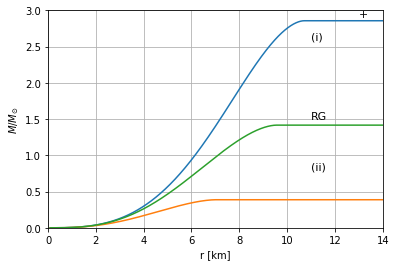

In [74]:
plt.plot(mod13[0]*89.7285,mod13[2]*254.62)
plt.plot(mod23[0]*89.7285,mod23[2]*254.62)
plt.plot(modGR[0]*89.7285,modGR[2]*254.62)
texto1 = plt.text(11, 2.6, r'(i)', fontsize=11)
texto2 = plt.text(11, 0.8, r'(ii)', fontsize=11)
texto3 = plt.text(11, 1.5, r'RG', fontsize=11)
texto4 = plt.text(13, 2.9, r'+', fontsize=11)
plt.xlabel('r [km]')
plt.ylabel('$M/M_{\odot}$')
plt.xlim(right=14,left=0)
plt.ylim(bottom=0,top=3)
plt.grid()
#plt.savefig('masacuartica.pdf', format='pdf', dpi=1200)
plt.show()

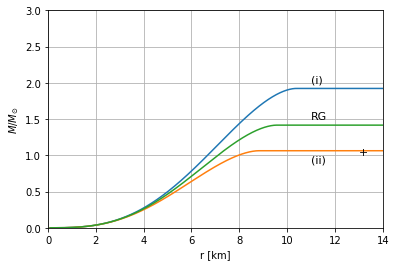

In [61]:
plt.plot(mod11[0]*89.7285,mod11[2]*254.62)
plt.plot(mod21[0]*89.7285,mod21[2]*254.62)
plt.plot(modGR[0]*89.7285,modGR[2]*254.62)
texto1 = plt.text(11, 2, r'(i)', fontsize=11)
texto2 = plt.text(11, 0.9, r'(ii)', fontsize=11)
texto3 = plt.text(11, 1.5, r'RG', fontsize=11)
texto4 = plt.text(13, 1.0, r'+', fontsize=11)
plt.xlabel('r [km]')
plt.ylabel('$M/M_{\odot}$')
plt.xlim(right=14,left=0)
plt.ylim(bottom=0,top=3)
plt.grid()
#plt.savefig('masacuartican1.pdf', format='pdf', dpi=1200)
plt.show()

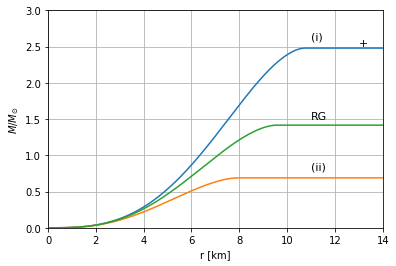

In [65]:
plt.plot(mod1[0]*89.7285,mod1[2]*254.62)
plt.plot(mod2[0]*89.7285,mod2[2]*254.62)
plt.plot(modGR[0]*89.7285,modGR[2]*254.62)
texto1 = plt.text(11, 2.6, r'(i)', fontsize=11)
texto2 = plt.text(11, 0.8, r'(ii)', fontsize=11)
texto3 = plt.text(11, 1.5, r'RG', fontsize=11)
texto4 = plt.text(13, 2.5, r'+', fontsize=11)
plt.xlabel('r [km]')
plt.ylabel('$M/M_{\odot}$')
plt.xlim(right=14,left=0)
plt.ylim(bottom=0,top=3)
plt.grid()
#plt.savefig('masacuartica.pdf', format='pdf', dpi=1200)
plt.show()

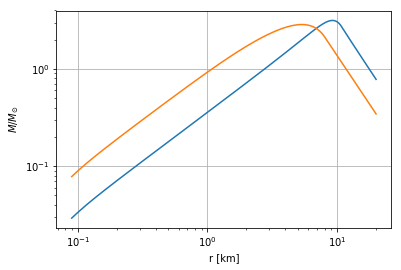

In [35]:
plt.plot(mod1[0]*89.7285,abs(mod1[4]))
plt.plot(mod2[0]*89.7285,abs(mod2[4]))
#plt.plot(modGR[0]*89.7285,modGR[3]*254.62)
#texto1 = plt.text(11, 2.6, r'(i)', fontsize=11)
#texto2 = plt.text(11, 0.8, r'(ii)', fontsize=11)
#texto3 = plt.text(11, 1.5, r'RG', fontsize=11)
plt.xlabel('r [km]')
plt.ylabel('$M/M_{\odot}$')
#plt.xlim(right=14,left=0)
#plt.ylim(bottom=0,top=3)
plt.xscale('log')
plt.yscale('log')
plt.grid()
#plt.savefig('masacuartica.pdf', format='pdf', dpi=1200)
plt.show()

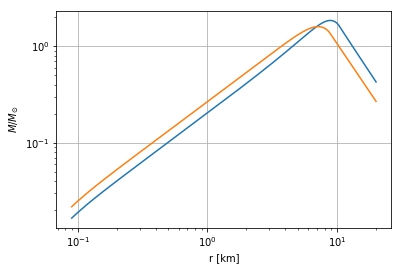

In [41]:
plt.plot(mod11[0]*89.7285,abs(mod11[4]))
plt.plot(mod21[0]*89.7285,abs(mod21[4]))
#plt.plot(modGR[0]*89.7285,modGR[3]*254.62)
#texto1 = plt.text(11, 2.6, r'(i)', fontsize=11)
#texto2 = plt.text(11, 0.8, r'(ii)', fontsize=11)
#texto3 = plt.text(11, 1.5, r'RG', fontsize=11)
plt.xlabel('r [km]')
plt.ylabel('$M/M_{\odot}$')
#plt.xlim(right=14,left=0)
#plt.ylim(bottom=0,top=3)
plt.xscale('log')
plt.yscale('log')
plt.grid()
#plt.savefig('masacuartica.pdf', format='pdf', dpi=1200)
plt.show()